In [40]:

import numpy as np
import pandas as pd
     

###`Q-1:` Write a program to create an empty series.

In [41]:
# code here

pd.Series([],dtype=int)

Series([], dtype: int64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [42]:
# code here
arr1 = [4,1,5,7,9,2]
arr2 = [1,4,2,5,8,3]

pds1 = pd.Series(arr1,dtype=np.int32)
pds2 = pd.Series(arr2,dtype=np.int32)

pds1+pds2

0     5
1     5
2     7
3    12
4    17
5     5
dtype: int32

In [43]:
pds2-pds1

0   -3
1    3
2   -3
3   -2
4   -1
5    1
dtype: int32

In [44]:
pds1*pds2

0     4
1     4
2    10
3    35
4    72
5     6
dtype: int32

In [45]:
pds1/pds2

0    4.000000
1    0.250000
2    2.500000
3    1.400000
4    1.125000
5    0.666667
dtype: float64

###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [46]:
# code here

arr1 = [2,4,6,8,10]
arr2 = [1,3,5,7,10]

pds1 = pd.Series(arr1)
pds2 = pd.Series(arr2)

result = pds1.compare(pds2)
print(result)

   self  other
0   2.0    1.0
1   4.0    3.0
2   6.0    5.0
3   8.0    7.0


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [47]:
# code here
def changeDataType(series,datatype):
 new =pd.to_numeric(series, errors='coerce').astype(datatype)
 return new


series = pd.Series([1,2,'Python', 2.0, True, 100])
datatype = 'float'

ans = changeDataType(series,datatype)
print(ans)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [74]:
# code here

cricket = pd.read_csv('/content/sample_data/batsman_runs_series.csv',index_col='batter').squeeze("columns")
cricket

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [76]:

cricket.sort_values(ascending=False)

batter
V Kohli            True
S Dhawan           True
DA Warner          True
RG Sharma          True
SK Raina           True
                  ...  
C Nanda           False
Akash Deep        False
S Ladda           False
V Pratap Singh    False
S Lamichhane      False
Name: batsman_run, Length: 605, dtype: bool

###`Q-7` No of players having runs above 3000

In [79]:
# code here
mask = cricket.sort_values(ascending=False)>3000
cricket[mask]
len(cricket[mask])

20

###`Q-8` No of players having runs above mean value?

In [85]:
# code here
mean_val = cricket.mean()
no_of_players = cricket[cricket.values > mean_val]
len(no_of_players)

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to BDT.without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [219]:
# code here
# i
item = pd.read_csv('/content/sample_data/items.csv', index_col='item_name').squeeze('columns')
items = item.copy()
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [220]:
# ii
nan_items = items[items.isna()]

len(nan_items)

50

In [221]:
exchangeRate = 108
st = items.str[1:]
st = st.astype(float)
st = st*exchangeRate
items = st
items

item_name
Chips and Fresh Tomato Salsa              258.12
Izze                                      366.12
Nantucket Nectar                          366.12
Chips and Tomatillo-Green Chili Salsa     258.12
Chicken Bowl                             1833.84
                                          ...   
Steak Burrito                            1269.00
Steak Burrito                            1269.00
Chicken Salad Bowl                       1215.00
Chicken Salad Bowl                        945.00
Chicken Salad Bowl                        945.00
Name: item_price, Length: 4622, dtype: float64

In [222]:

# iv
print(items[items.isna()])
items[items.isna()] = items.mean()

item_name
Side of Chips                        NaN
Steak Soft Tacos                     NaN
Chips                                NaN
Chicken Burrito                      NaN
Veggie Bowl                          NaN
Steak Salad Bowl                     NaN
Chicken Salad Bowl                   NaN
Barbacoa Burrito                     NaN
Chicken Soft Tacos                   NaN
Chicken Bowl                         NaN
Steak Burrito                        NaN
Chips and Guacamole                  NaN
Chips and Roasted Chili Corn Salsa   NaN
Chips and Fresh Tomato Salsa         NaN
Steak Bowl                           NaN
Steak Burrito                        NaN
Chicken Bowl                         NaN
Canned Soft Drink                    NaN
Chicken Soft Tacos                   NaN
Steak Burrito                        NaN
Steak Burrito                        NaN
Steak Burrito                        NaN
Carnitas Soft Tacos                  NaN
Chips                                NaN
Chicke

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [223]:
# code here
mean_price = items.mean()
print(mean_price)

806.0074015748032


In [224]:

print(np.percentile(items.values,50))
print(np.percentile(items.values,6))


945.0
135.0


<Axes: ylabel='Frequency'>

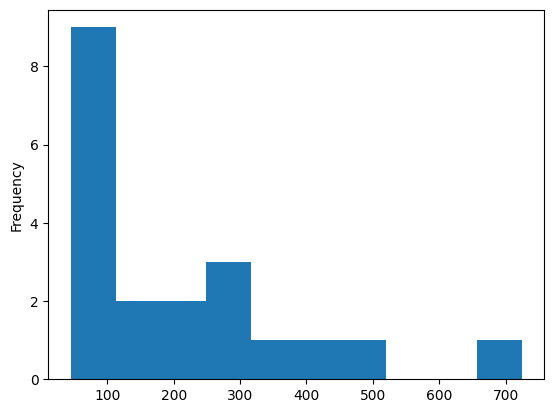

In [230]:
items.value_counts().head(20).plot(kind='hist')

In [234]:
items.sort_values(ascending = False)

item_name
Chips and Fresh Tomato Salsa    4779.00
Carnitas Bowl                   3807.00
Chicken Burrito                 3780.00
Chicken Burrito                 3780.00
Veggie Burrito                  3645.00
                                 ...   
Canned Soda                      117.72
Canned Soda                      117.72
Canned Soda                      117.72
Canned Soda                      117.72
Canned Soda                      117.72
Name: item_price, Length: 4622, dtype: float64

In [240]:

print(items.dtype)

int64


In [250]:
items[items.between(1000,2000)]

item_name
Chicken Bowl          1833
Chicken Bowl          1185
Steak Burrito         1269
Chicken Bowl          1215
Chicken Burrito       1185
                      ... 
Steak Burrito         1269
Veggie Burrito        1215
Steak Burrito         1269
Steak Burrito         1269
Chicken Salad Bowl    1215
Name: item_price, Length: 1089, dtype: int64